In [1]:
import sklearn
import numpy as np
np.random.seed(13)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
X = iris['data'][:, (2,3)]
y= (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=13))
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=13))])

In [3]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [4]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=13)
X.shape, y.shape

((100, 2), (100,))

In [5]:
def plot_datasets(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r'$x_1$', fontsize=20)
    plt.ylabel(r'$x_2$', fontsize=20, rotation=0)

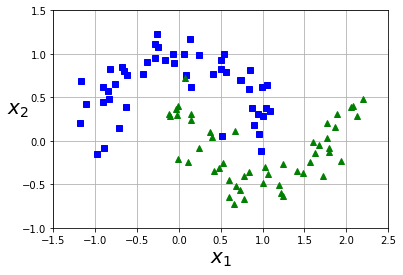

In [6]:
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5]);

In [7]:
polynomial_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=13))
])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=13))])

In [8]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

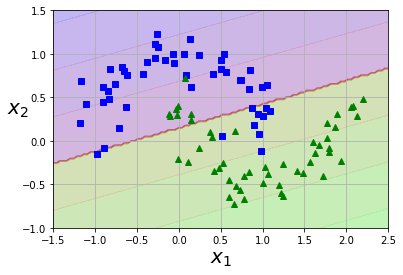

In [9]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5]);

In [10]:
from sklearn.preprocessing import PolynomialFeatures
X_tmp = np.arange(6).reshape(3, 2)
X_tmp

array([[0, 1],
       [2, 3],
       [4, 5]])

In [11]:
poly = PolynomialFeatures(2)
poly.fit_transform(X_tmp)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [12]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
poly.fit_transform(X_tmp)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [13]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly.fit_transform(X_tmp)

array([[ 0.,  1.,  0.],
       [ 2.,  3.,  6.],
       [ 4.,  5., 20.]])

In [14]:
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=13))
])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=13))])

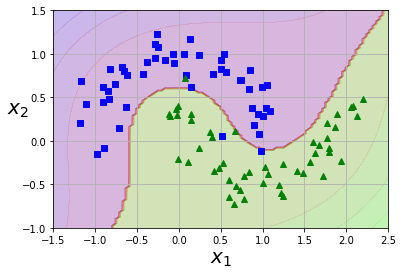

In [15]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5]);

In [16]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

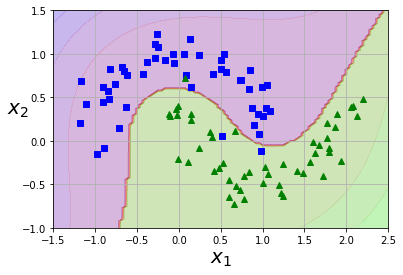

In [17]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5]);

In [18]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

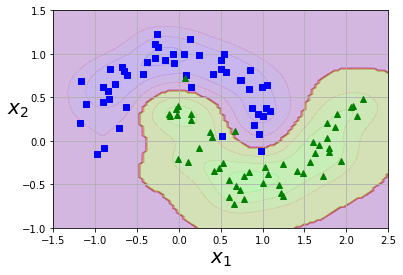

In [19]:
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5]);

In [20]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=1000))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1000, gamma=5))])

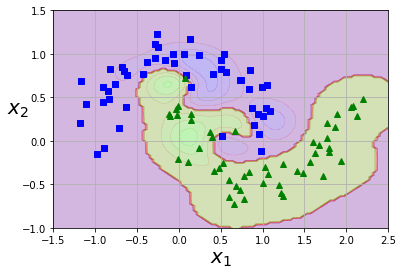

In [21]:
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5]);

In [22]:
np.random.seed(13)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [23]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=13)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=13)

In [24]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=13)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=13)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

LinearSVR(epsilon=0.5, random_state=13)

In [25]:
def find_support_vectors(svm_reg, X , y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

In [26]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, 'k-', linewidth=2, label=r'$\hat{y}$')
    plt.plot(x1s, y_pred + svm_reg.epsilon, 'k-')
    plt.plot(x1s, y_pred - svm_reg.epsilon, 'k-')
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, 'bo')
    plt.xlabel(r'$x_1$', fontsize=18)
    plt.legend(loc='upper left', fontsize=18)
    plt.axis(axes)

In [27]:
svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

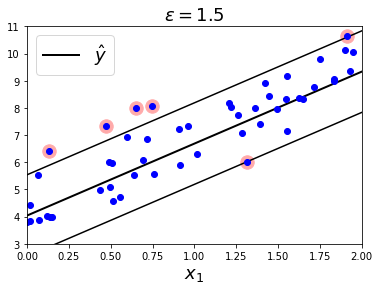

In [28]:
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r'$\epsilon = {}$'.format(svm_reg1.epsilon), fontsize=18)
plt.show()

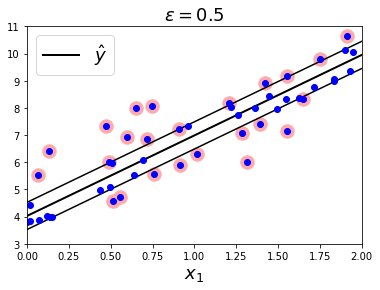

In [29]:
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r'$\epsilon = {}$'.format(svm_reg2.epsilon), fontsize=18)
plt.show()

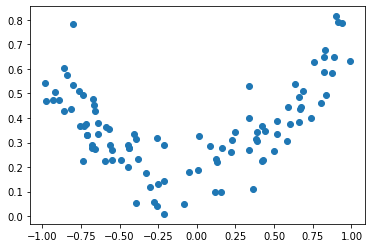

In [30]:
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()
plt.scatter(X, y);

In [31]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel='poly', degree=2, C=100, epsilon=0.1, gamma='scale')
svm_poly_reg2 = SVR(kernel='poly', degree=2, C=0.01, epsilon=0.1, gamma='scale')
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

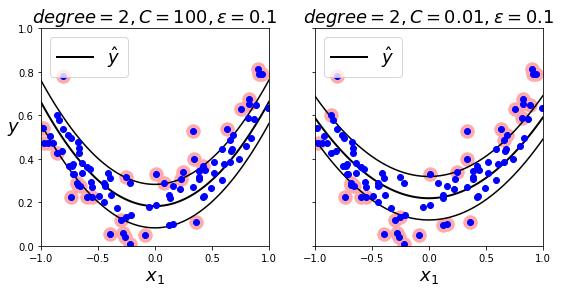

In [32]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r'$degree={}, C={}, \epsilon={}$'.format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r'$y$', fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r'$degree={}, C={}, \epsilon={}$'.format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()